<a href="https://colab.research.google.com/github/kipsangchepesa/core-module-1/blob/main/Titans_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALYSIS RISK FACTORS OF CERVICAL CANCER.**

# Defining the Question

To determine if long term infection of human papillomavirus(HPV) is the main cause of cervical cancer.

# Defining the Metric for Success

To create a model that can predict the likelihood of a woman being dignosed with cervical cancer from the risk factors being ivestigated.

# Understanding the context

This research was conducted in Caracas, Venezuela about 858 women in the hospital. It was conducted by recording the health history, demographic information and lifestyles. It aims at trying to prove the notion that having HPV is the main cause of cervical cancer and also try to build a model that can help in diagnosis of the disease.

# Recording the Experimental Design

The following are the steps we are going to follow:

Data cleaning and preparation.

1.   Data cleaning and preparation.
2.   Load libraries and datasets
3.   Deal with missing values
4.   Deal with duplicated values
5.   Drop unnecessary columns.
6.   Univariate analysis
7.   Bivariate analysis
8.   Multivariate analysis.
9.   Hypothesis testing.
10.  Conclusion and recomendation.


In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
df= pd.read_csv("https://raw.githubusercontent.com/datasets/cervical-cancer/b8f016c3d703320e9b8cfc0023898c3f503c42da/data/cervical-cancer.csv")

In [ ]:
#previewing the head
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
#Previewing the tail
df.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
830,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
834,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
#Dropping unnecessarry columns because they were irrelevant to our analysis.
#For example, STDs: Time since first diagnosis and STDs: Time since last diagnosis had 750 missing data.
df.drop(["Smokes (years)", "STDs (number)", "STDs: Number of diagnosis", "Smokes (packs/year)",
         "Hormonal Contraceptives (years)", "IUD (years)", "STDs: Time since first diagnosis", "Hinselmann", "Schiller", "Citology", "Biopsy",
          "STDs: Time since last diagnosis","STDs:cervical condylomatosis", "STDs:AIDS"], axis= 1, inplace= True)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
#Checking the shape of the dataset.
df.shape

(835, 22)

In [ ]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Hormonal Contraceptives             732 non-null    float64
 6   IUD                                 723 non-null    float64
 7   STDs                                735 non-null    float64
 8   STDs:condylomatosis                 735 non-null    float64
 9   STDs:vaginal condylomatosis         735 non-null    float64
 10  STDs:vulvo-perineal condylomatosis  735 non-null    float64
 11  STDs:syphilis                       735 non-n

In [ ]:
#Checking if the datatypes are appropriate
df.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Hormonal Contraceptives               float64
IUD                                   float64
STDs                                  float64
STDs:condylomatosis                   float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:HIV                              float64
STDs:Hepatitis B                      float64
STDs:HPV                              float64
Dx:Cancer                               int64
Dx:CIN                                  int64
Dx:HPV                                  int64
Dx                                

In [ ]:
# Replacing all the missing with mode
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
#Checking if there are missing or null values.
df.isnull().sum()

#We noticed there are null values so we have to deal with them.

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Hormonal Contraceptives               0
IUD                                   0
STDs                                  0
STDs:condylomatosis                   0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Dx                                    0
dtype: int64

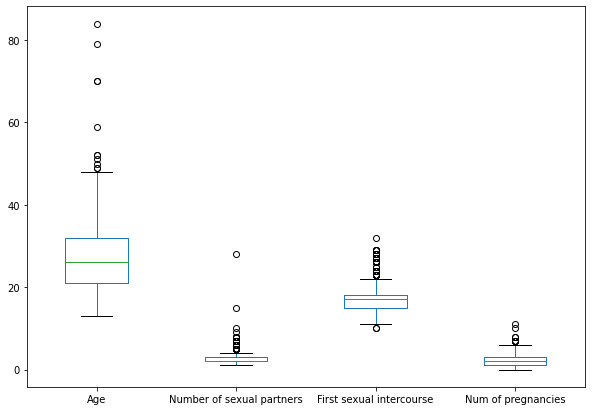

In [ ]:
#Checking for outliers in the numerical columns

df.boxplot(["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies"] , grid=False, figsize=[10,7])

In [ ]:
df.to_csv('cervical_cancer.csv',index=False)

In [ ]:
df5 = pd.read_csv('cervical_cancer.csv')
df5.head(1)
df5

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
df5.iloc(['Dx'] == 1)

# UNIVARIATE ANALYSIS

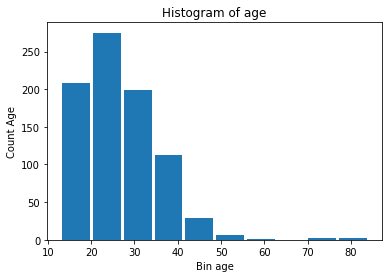

In [ ]:
#plotting  Histogram
x = df['Age']
num_bins = 10

plt.hist(x, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel("Bin age")
plt.ylabel("Count Age")
plt.title('Histogram of age') 
plt.show()

In [ ]:
# Frequency table
df['Number of sexual partners'].value_counts()

2.0     291
3.0     207
1.0     193
4.0      76
5.0      44
6.0       9
7.0       7
8.0       4
9.0       1
28.0      1
10.0      1
15.0      1
Name: Number of sexual partners, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

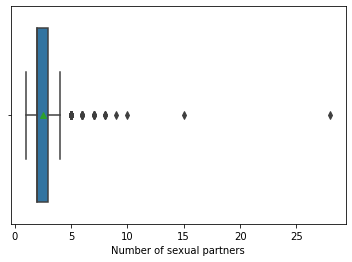

In [ ]:
# Box Plot 
sns.boxplot(df["Number of sexual partners"], showmeans=True)
plt.show

In [ ]:
# Measure of Central Tendancy (Mean)
df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies"]].mean().round()

Age                          27.0
Number of sexual partners     3.0
First sexual intercourse     17.0
Num of pregnancies            2.0
dtype: float64

In [ ]:
# Measure of Central Tendancy(mode)
df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies"]].mode()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies
0,23,2.0,15.0,1.0


In [ ]:
# Measure of Central Tendancy(median)
df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies"]].median()

Age                          26.0
Number of sexual partners     2.0
First sexual intercourse     17.0
Num of pregnancies            2.0
dtype: float64

In [ ]:
# Measure of dispersion (standartd Deviation)
df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies"]].std()

Age                          8.482986
Number of sexual partners    1.654044
First sexual intercourse     2.811203
Num of pregnancies           1.443486
dtype: float64

In [ ]:
# Measure of dispersion(Quantile)

df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies"]].quantile([0.25,0.5,0.75])

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies
0.25,21.0,2.0,15.0,1.0
0.50,26.0,2.0,17.0,2.0
0.75,32.0,3.0,18.0,3.0


In [ ]:
# Measure of dispersion(varience)

df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies"]].var()

Age                          71.961056
Number of sexual partners     2.735861
First sexual intercourse      7.902865
Num of pregnancies            2.083651
dtype: float64

In [ ]:
# Measure of dispersion(kurtosis)
df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies"]].kurt()

Age                           4.866192
Number of sexual partners    71.243023
First sexual intercourse      4.313250
Num of pregnancies            3.290051
dtype: float64

In [ ]:
# Measure of dispersion (skweness)
df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies"]].skew()

Age                          1.403917
Number of sexual partners    5.567192
First sexual intercourse     1.578100
Num of pregnancies           1.468343
dtype: float64

# BIVARIATE ANALYSIS.

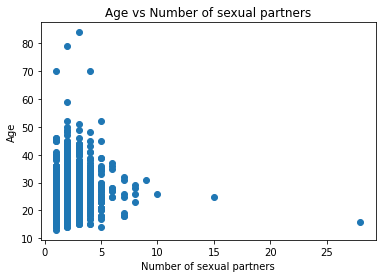

In [ ]:
# Plotting our scatterplot to compare the variables

# Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(df["Number of sexual partners"] , df["Age"])

# Giving our scatterplot a title
plt.title('Age vs Number of sexual partners')

# Labelling our x axis
plt.xlabel('Number of sexual partners')

# Labelling our y axis
plt.ylabel('Age')

# We then display our scatterplot as shown below
plt.show()

#Conclusion 
#There is correlation bewtween age and number of sexual partners 

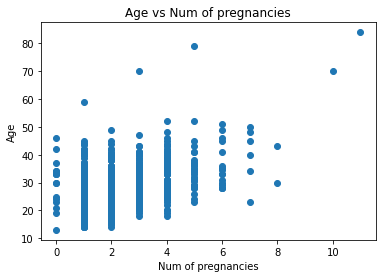

In [ ]:
# Plotting our scatterplot to compare the variables
#trees_df.plot(x = 'diameter_at_breast_height_cm', y = 'clear_fell_ksh/_m_cubed', kind='scatter')

# Or Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(df["Num of pregnancies"] , df["Age"])

# Giving our scatterplot a title
plt.title('Age vs Num of pregnancies')

# Labelling our x axis
plt.xlabel('Num of pregnancies')

# Labelling our y axis
plt.ylabel('Age')

# We then display our scatterplot as shown below
plt.show()

#conclusion 
# THere is no corrrelation between the number of pregnancies and age 

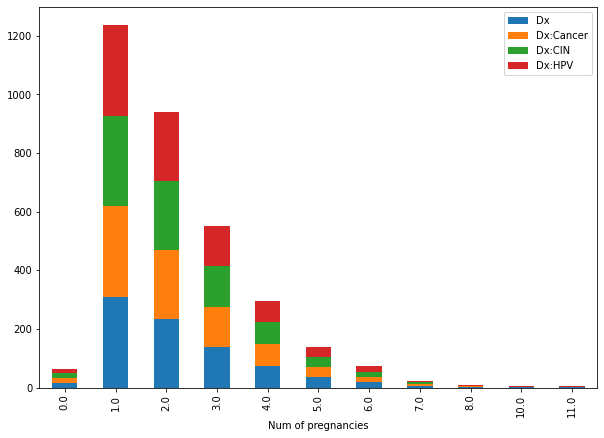

In [ ]:
# plotting a scatter plot

x= df[['Num of pregnancies','Dx','Dx:Cancer','Dx:CIN','Dx:HPV']]
y= x.set_index('Num of pregnancies')
z=y.groupby('Num of pregnancies').count()


z.plot.bar(stacked=True, figsize = [10,7])

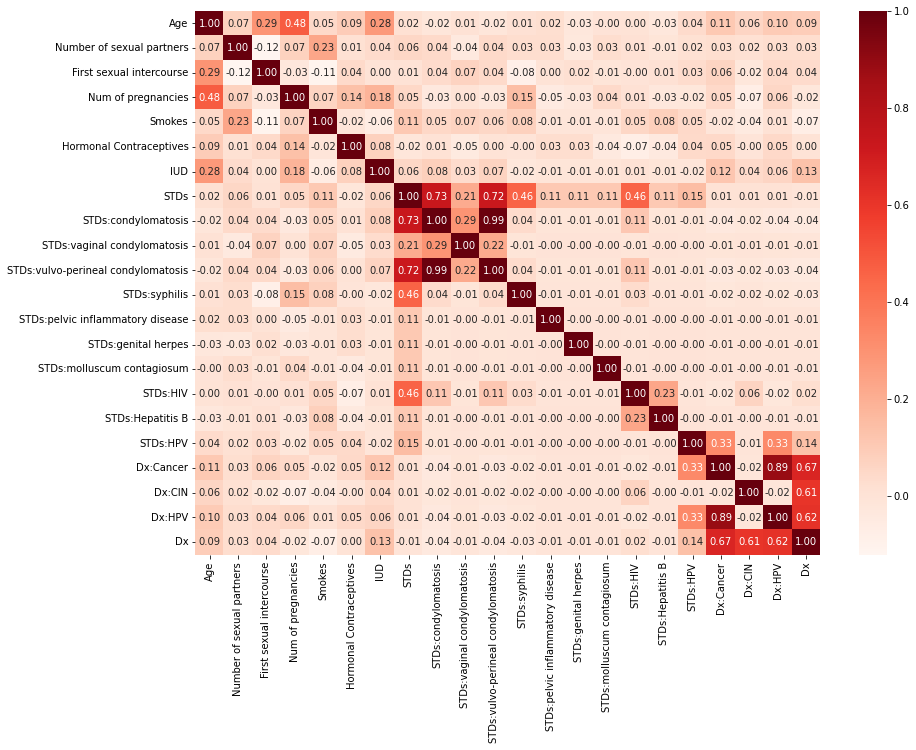

In [ ]:
#Plotting a heat map to show correlation between the variables
plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

#### Heat map summary
1.   There is a correlation between HIV and STDs.
2.   There is a correlation between STDs:Hepatitis B and STDs.
3.   There is a very high correlation between HPV Diagnosis and       Having another cancer.
4.   There is a strong correlation between Diagnosis of HPV and diagnosis of cervical cancer.
5.   Similarly there is a strong correlation between Diagnosis of CIN and diagnosis of cervical cancer.
6.  Similarly there is a strong correlation between Diagnosis of another cancer and diagnosis of
7.  There is a correlation between the age of a person and the number of pregnancies they have had.
8.  There is a very high correlation between STDs:vulvo-perineal condylomatosis and STDs:condylomatosis.

# **MULTIVARIATE ANALYSIS**

In [ ]:
# Separating our target label (has bank account) from the other features
feat= df.drop(['Dx'], axis= 1)
cancer_label = df['Dx']

# Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(feat, cancer_label)
lda_feat = lda_.transform(feat)

# Display the coeficients of the reducted columns
lda_.coef_

# Since the coefficients are in an array, we needto create a dataframe so 
#that we can extract the name of the columns

f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
Dx:CIN,222.012218
Dx:Cancer,143.811260
Dx:HPV,40.423215
IUD,5.249377
STDs:vulvo-perineal condylomatosis,5.120457
STDs:syphilis,1.279477
STDs:vaginal condylomatosis,1.131441
STDs:pelvic inflammatory disease,0.954033
STDs:Hepatitis B,0.585237
First sexual intercourse,0.374327


In [ ]:
# sliping target and feature dataset 
X = df[['Dx:CIN','Dx:Cancer','Dx:HPV','IUD','STDs:vulvo-perineal condylomatosis','STDs:HPV']]
y =df['Dx']

In [ ]:
# spliting test and train dataset 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[162   0]
 [  4   1]]
Accuracy 0.9760479041916168


In [ ]:
#converting Arry to dataframe 
# Check how accurate our Model is 
df_test = pd.DataFrame(y_test)
df_test

,Dx
747,1
638,0
31,0
739,0
412,0
...,...
338,0
2,0
827,0
792,0


In [ ]:
# using Patient 747 to check and it predicted correcly 
df.loc[747]

Age                                   26.0
Number of sexual partners              2.0
First sexual intercourse              15.0
Num of pregnancies                     2.0
Smokes                                 0.0
Hormonal Contraceptives                1.0
IUD                                    0.0
STDs                                   0.0
STDs:condylomatosis                    0.0
STDs:vaginal condylomatosis            0.0
STDs:vulvo-perineal condylomatosis     0.0
STDs:syphilis                          0.0
STDs:pelvic inflammatory disease       0.0
STDs:genital herpes                    0.0
STDs:molluscum contagiosum             0.0
STDs:HIV                               0.0
STDs:Hepatitis B                       0.0
STDs:HPV                               0.0
Dx:Cancer                              0.0
Dx:CIN                                 1.0
Dx:HPV                                 0.0
Dx                                     1.0
Name: 747, dtype: float64

# **HYPOTHESIS TESTING**

## Hypothesis 


1.   **Null Hypothesis**- HPV is one of the leading causes of cervical cancer
2.   **Alternative Hypothesis** - HPV is not one of the leading causes of cervical cancer



In [ ]:
# Sample Size 
# we used simple random sampling 

cancer_sample = df1.sample(n = 20, replace="False")
cancer_sample.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
307,23,2.0,18.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
443,16,1.0,14.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
137,29,1.0,28.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
196,26,5.0,18.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
532,20,3.0,17.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
#Importing the necessary to be used for finding a z statistic
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest, pval = stests.ztest(cancer_sample['Dx:HPV'], x2 = cancer_sample['Dx'], value =0, alternative = 'two-sided')
print(ztest, pval)

#Setting our alpha to 0.05, but since this is a two tailed test we are going to use 0.025
if pval < 0.025:
  print('reject the null hypothesis')
else:
  print('fail to reject the null hypothesis')

-1.0000000000000002 0.31731050786291404
fail to reject the null hypothesis


## Summary Conclusion 

 While HPV is a leading canse of cervical cancer , there are other higher risk factors that predispose one to cervical cancer;

A CIN diagnosis has been seen to be the leading cause of cervical cancer.

 A diagnosis of any other cancer, apart from cervical cancer, is the second leading cause of cervical cancer

 A HPV diagnosis comes in third when it comes to a cervical cancer diagnosis

